In [1]:
"""
Purpose: To be able and tell when theh branching activity
does not have a large angle between the sides and they run alongside each other

- this will be ignored for the very thick apical

"""

'\nPurpose: To be able and tell when theh branching activity\ndoes not have a large angle between the sides and they run alongside each other\n\n- this will be ignored for the very thick apical\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-20 21:41:00,638 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-20 21:41:00,644 - settings - Setting database.user to celiib
INFO - 2021-04-20 21:41:00,645 - settings - Setting database.password to newceliipass
INFO - 2021-04-20 21:41:00,653 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-20 21:41:00,658 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-20 21:41:00,670 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-20 21:41:01,197 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-20 21:41:01,203 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-20 21:41:01,204 - settings - Setting database.user to celiib
INFO - 2021-04-20 21:41:01,206 - settings - Setting database.password to newceliipass
INFO - 2021-04-20 21:41:01,206 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-20 21:41:01,211 - settings - Setting database.user to celiib
INFO - 2021-04-20 21:41:01,215 - settings - Setting database.password to newceliipass
INFO - 2021-04-20 21:41:01,220 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-20 21:41:01,888 - settings - Setting enable_python_native_blobs to True


In [5]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-20 21:41:15,408 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-20 21:41:15,415 - settings - Setting database.user to celiib
INFO - 2021-04-20 21:41:15,417 - settings - Setting database.password to newceliipass
INFO - 2021-04-20 21:41:15,428 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-20 21:41:16,392 - settings - Setting enable_python_native_blobs to True


In [6]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru

# Downloading the neuron

In [25]:
segment_id = 864691136105498585
minnie.Decomposition() & f"segment_id = {segment_id}"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691136105498585,0,0.25,30.00,7,0,1,=BLOB=,332957,689602,0,0,0,0,1,6,62,39,4205904.168949035,1856257.3544398847,45864.626,85.841,85.841,265.2,261.743,273,6.490875422589973e-05,4.403225806451613,2602808.095,22,0.00010488671851160812,12.409,104869717119.14374,120838601.86167398,24933.929282879602,40290.990842005864,4766805323.597443,3630.983


In [ ]:
neuron_obj = du.fetch_neuron_obj_manual(segment_id=segment_id,
                                       border_validation=False)

In [170]:
import axon_utils as au
neuron_obj_axon = au.complete_axon_processing(neuron_obj)
neuron_obj_axon

endnodes_to_test = [1935]
Skeleton paths distances = [24973.03453593]
Filtered indexes = [0]
len(filtered_skeletons) = 1
sk_angles = [122.1524023]
base_final_widths = [107.94224631 107.94224631 107.94224631]
overall_ais_width = 107.94224630762344
ais_width = 107.94224630762342
endnodes_to_test = []
endnodes_to_test = []
endnodes_to_test = []
endnodes_to_test = []
endnodes_to_test = []
Starting axon branch was not the limb starting node so generating border vertices and computing upstream branch
upstream_node_to_axon_starting_branch = 8
More than 1 seperated mesh (taking the top one): [<trimesh.Trimesh(vertices.shape=(52110, 3), faces.shape=(104013, 3))>
 <trimesh.Trimesh(vertices.shape=(13721, 3), faces.shape=(27348, 3))>
 <trimesh.Trimesh(vertices.shape=(1756, 3), faces.shape=(3507, 3))>
 <trimesh.Trimesh(vertices.shape=(126, 3), faces.shape=(252, 3))>]
root_curr = [712022.6 863223.5 798451.2]
Time for preparing soma vertices and root: 0.0005376338958740234
invalidation_d = 1500
smoot

100%|██████████| 1/1 [00:01<00:00,  1.97s/it]


all_paths = [[[3533, 48022, 42966, 46639, 47047, 36812, 33568, 50089, 43495, 21416, 3850, 50253, 27015, 9250, 17342, 25921, 34025, 34026, 20389, 20390, 20387, 48813, 24520, 2771, 45276, 47104, 44607, 23209, 27203, 20462, 13685, 39385, 17514, 50269, 51421, 8287, 11240, 28809, 50950, 6915, 48085, 18991, 49252, 23405, 1889, 5627, 31624, 5625, 50704, 46896, 13843, 30008, 26295, 624, 622, 26303, 4283, 12987, 50904, 49769, 32329, 48134, 30769, 34356, 34630, 8495, 48918, 18001, 18002, 13998, 18005, 23494, 1736, 33909, 49865, 49193, 27306, 46543, 48747, 29362, 7514, 37649, 32212, 28145, 51391, 28141, 51024, 25643, 11650, 51488, 26959, 39141, 3819, 21864, 14667, 10683, 1595, 31340, 31342, 48184, 2742, 197, 24895, 41276, 27070, 23118, 5192, 24609, 47430, 36744, 15921, 14823, 49472, 22849, 24454, 45654, 2869, 5984, 51561, 6809, 28582, 44533, 51223, 4835, 51548, 34173, 50311, 51210, 20502, 26719, 23308, 27492, 31701, 39638, 13768, 17905, 43616, 561, 26201, 26206, 564, 33575, 46621, 51100, 3359, 33

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 3.386251449584961
branches_touching_root = [16]
combining close nodes
combine_threshold = 1300
length of Graph = 13518
After combining close endpoints max(kept_branches_idx) = 141, len(kept_branches_idx) = 138
empty_indices % = 0.0
 conflict_indices % = 0.031758088553434934
AFTER face_lookup_resolved_test
Decomposing first pass: 12.220884561538696
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 0.0002779960632324219
Total time for MAP sublimb processing 5.245208740234375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 0.0004138946533203125
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.2631347179412842
sbv[0].reshape(-1,3) = [[712022.6 863223.5 798451.2]]
closest_sk_pt_coord BEFORE = [712057.07381247 863501.406

In [171]:
nviz.plot_axon(neuron_obj_axon)


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [120]:
nviz.plot_boutons(neuron_obj_axon,
                  plot_web=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Want to visualize the error mesh where might have forking

In [173]:
error_mesh = vu.error_mesh_from_manual_proofreading(neuron_obj.segment_id,
                                                       plot_error_and_valid_mesh=True)
error_mesh

<trimesh.Trimesh(vertices.shape=(14211, 3), faces.shape=(26678, 3))>

In [174]:
error_branches = vu.error_branches_from_old_new_segment_mesh(neuron_obj_axon,
                                           )["L0"]

In [177]:
for b in error_branches:
    print(f"Branch {b}:")
    nviz.plot_branches_with_boutons(neuron_obj_axon[0][b])

Branch 106:
No boutons to plot
width = {'median_mesh_center': 77.34531379438725, 'no_spine_median_mesh_center': 77.34531379438725, 'no_bouton_median': 77.34531379438725}, 
n_boutons = 0,
skeleton_length (in microns) = 3.2072250047303976
area = 3.737826128004001


Branch 116:
No boutons to plot
width = {'median_mesh_center': 63.428307704865055, 'no_spine_median_mesh_center': 63.428307704865055, 'no_bouton_median': 63.428307704865055}, 
n_boutons = 0,
skeleton_length (in microns) = 3.3466404488929307
area = 1.5826053655587597


Branch 201:
width = {'median_mesh_center': 55.105065062492656, 'no_spine_median_mesh_center': 55.105065062492656, 'no_bouton_median': 54.329591673521904}, 
n_boutons = 1,
skeleton_length (in microns) = 13.23998282920901
area = 7.966232576286011


Branch 202:
width = {'median_mesh_center': 81.21958921474048, 'no_spine_median_mesh_center': 81.21958921474048, 'no_bouton_median': 71.43840606409488}, 
n_boutons = 1,
skeleton_length (in microns) = 7.177023213392976
area = 5.609573609002603


Branch 203:
No boutons to plot
width = {'median_mesh_center': 68.1231045152641, 'no_spine_median_mesh_center': 68.1231045152641, 'no_bouton_median': 68.1231045152641}, 
n_boutons = 0,
skeleton_length (in microns) = 2.872279976007936
area = 2.3834528702048807


Branch 204:
No boutons to plot
width = {'median_mesh_center': 73.28560065406458, 'no_spine_median_mesh_center': 73.28560065406458, 'no_bouton_median': 73.28560065406458}, 
n_boutons = 0,
skeleton_length (in microns) = 5.596428647506561
area = 3.5518673207294


Branch 205:
width = {'median_mesh_center': 62.489472690448906, 'no_spine_median_mesh_center': 62.489472690448906, 'no_bouton_median': 62.32705630571049}, 
n_boutons = 1,
skeleton_length (in microns) = 30.730819629073274
area = 17.507151560305537


Branch 206:
width = {'median_mesh_center': 96.4635837978665, 'no_spine_median_mesh_center': 96.4635837978665, 'no_bouton_median': 82.5251764640407}, 
n_boutons = 24,
skeleton_length (in microns) = 95.35040431091511
area = 81.65812010772243


Branch 215:
No boutons to plot
width = {'median_mesh_center': 79.97815376915433, 'no_spine_median_mesh_center': 79.97815376915433, 'no_bouton_median': 79.97815376915433}, 
n_boutons = 0,
skeleton_length (in microns) = 4.231014502088096
area = 2.674739811277842


Branch 225:
No boutons to plot
width = {'median_mesh_center': 61.554317101069984, 'no_spine_median_mesh_center': 61.554317101069984, 'no_bouton_median': 61.554317101069984}, 
n_boutons = 0,
skeleton_length (in microns) = 9.171479041102499
area = 6.51972313744994


Branch 226:
No boutons to plot
width = {'median_mesh_center': 89.44114521968132, 'no_spine_median_mesh_center': 89.44114521968132, 'no_bouton_median': 89.44114521968132}, 
n_boutons = 0,
skeleton_length (in microns) = 4.029544814065714
area = 4.742516265537044


Branch 281:
No boutons to plot
width = {'median_mesh_center': 54.01629215672335, 'no_spine_median_mesh_center': 54.01629215672335, 'no_bouton_median': 54.01629215672335}, 
n_boutons = 0,
skeleton_length (in microns) = 1.8366515251736644
area = 1.1141174223114048


In [178]:
thin_fork_branch = 205

In [179]:
nviz.visualize_neuron(neuron_obj_axon,
                      visualize_type=["skeleton","mesh"],
                     limb_branch_dict=dict(L0=[thin_fork_branch]),
                     mesh_whole_neuron=True)


 Working on visualization type: skeleton

 Working on visualization type: mesh


In [134]:
neuron_obj_axon.save_compressed_neuron("./",file_name=f"{neuron_obj.segment_id}_fork_test",
                                       export_mesh=True)

Saving Neuorn in suppress_output mode...please wait
Saved File at location: 864691136105498585_fork_test


[6]

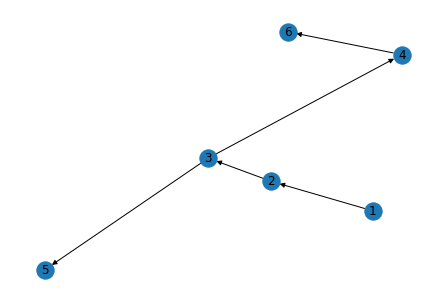

feature_list (before combining) = [13239.98282920901, 7177.023213392977, 2872.279976007936, 5596.428647506561, 30730.819629073274]
feature_list (after combining) = 59616.534295189755
Total skeleton downstream = 59616.534295189755


59616.534295189755

[201, 202, 203, 204]

In [182]:
[k for k in dir(xu) if "downstr" in k]

['all_downstream_nodes',
 'downstream_edges',
 'downstream_edges_neighbors',
 'downstream_nodes']

In [200]:
import networkx_utils as xu
"""
Purpose

Pseudocode: 
1) Get the branch where the error is
2) Get all the upstream branch and all of the downstream branches of that
3) Measure the sibling angles
4) Collect together the skeletons in a list
5) Run the fork splitting function

Note: should only be done on 2 forks
"""
branch_idx = 205
limb_obj = neuron_obj_axon[neuron_obj_axon.axon_limb_name]


verbose = False
error_not_2_downstream=True
skeleton_length_threshold = 4000
skip_value = np.inf
plot_fork_skeleton = False
upstream_sk_color="red"
downstream_sk_colors = None


verbose = True
plot_fork_skeleton = True


return_value = None
#2) Get all the upstream branch and all of the downstream branches of that
upstream_node = xu.upstream_node(limb_obj.concept_network_directional,
                                 branch_idx)
downstream_nodes = xu.downstream_nodes(limb_obj.concept_network_directional,upstream_node)

if error_not_2_downstream and len(downstream_nodes) != 2:
    raise Exception(f"Not exactly 2 downstream nodes: {downstream_nodes}")
    
    
upstream_sk = limb_obj[upstream_node].skeleton
downstream_sk = [limb_obj[d].skeleton for d in downstream_nodes]

if verbose:
    print(f"Upstream Node = {upstream_node}, downstream nodes = {downstream_nodes}")
    
if skeleton_length_threshold is not None:
    d_skeletal_len = np.array([nru.skeletal_length_over_downstream_branches(limb_obj,
                                            d,
                                            verbose=False) for d in downstream_nodes])
    below_threshold = np.where(d_skeletal_len<skeleton_length_threshold)[0]
    if len(below_threshold) > 0:
        if verbose:
            print(f"Skipping this intersection because some of downstream skeletal lengths too short (min {skeleton_length_threshold}):")
            for j,(d,d_len) in enumerate(zip(downstream_nodes,d_skeletal_len)):
                if j in below_threshold:
                    print(f"Brnach {d}:{d_len}")
                
        return_value = skip_value


if return_value is None:
    #3) Measure the sibling angles
    sibling_angle = list(nru.find_sibling_child_skeleton_angle(curr_limb_obj=limb_obj,
                                         child_node=branch_idx).values())
    if verbose:
        print(f"sibling_angle = {sibling_angle}")

    #4) Collect together the skeletons in a list


    if downstream_sk_colors is None:
        import matplotlib_utils as mu
        downstream_sk_colors = mu.generate_color_list(n_colors = len(downstream_nodes),
                              colors_to_omit = [upstream_sk_color])

    if plot_fork_skeleton:
        downstream_meshes = [limb_obj[d].mesh for d in downstream_nodes]
        upstream_mesh = limb_obj[upstream_node].mesh
        nviz.plot_objects(main_mesh=upstream_mesh,
                          main_mesh_color=upstream_sk_color,
                            main_skeleton=upstream_sk,
                          main_skeleton_color=upstream_sk_color,
                          meshes=downstream_meshes,
                          meshes_colors=downstream_sk_colors,
                         skeletons=downstream_sk,
                         skeletons_colors=downstream_sk_colors)
    


Upstream Node = 208, downstream nodes = [205 207]
sibling_angle = [42.49]


In [ ]:
sk.calculate_skeleton_segment_distances(sk.resize_skeleton_branch(upstream_sk,segment_width=skeletal_segment_size))

In [230]:
skeleton = upstream_sk
skeleton[1:,0].reshape(-1,3)

array([[597042.49632325, 938011.03417245, 830356.3364282 ],
       [597141.82915766, 938017.58483048, 830358.75749599],
       [597241.69861695, 938012.62221953, 830357.54770526],
       [597341.56807624, 938007.65960857, 830356.33791453],
       [597441.43753553, 938002.69699762, 830355.1281238 ],
       [597535.63305336, 938011.7417861 , 830341.14162434],
       [597617.51750746, 938051.17920176, 830299.43279526],
       [597699.40196156, 938090.61661741, 830257.72396618],
       [597781.28641566, 938130.05403306, 830216.0151371 ],
       [597864.64640171, 938119.93306233, 830246.72881663],
       [597948.39050657, 938096.9107721 , 830296.29593328],
       [598038.57680567, 938085.21077351, 830322.00515491],
       [598138.07969286, 938089.88487411, 830313.21150804],
       [598237.58258004, 938094.5589747 , 830304.41786116],
       [598336.60381192, 938090.87832486, 830291.38967287],
       [598435.56199444, 938086.10402658, 830277.80717723],
       [598534.52017696, 938081.3297283 

In [232]:
d_sk_ordered[0]

array([[[593874.8       , 937040.6       , 830389.5       ],
        [593847.38303582, 937031.30576299, 830378.92754665]],

       [[593847.38303582, 937031.30576299, 830378.92754665],
        [593802.90332434, 937016.2273255 , 830361.77540423]],

       [[593802.90332434, 937016.2273255 , 830361.77540423],
        [593758.42361286, 937001.14888801, 830344.62326181]],

       [[593758.42361286, 937001.14888801, 830344.62326181],
        [593713.94390138, 936986.07045053, 830327.47111939]],

       [[593713.94390138, 936986.07045053, 830327.47111939],
        [593669.4641899 , 936970.99201304, 830310.31897697]],

       [[593669.4641899 , 936970.99201304, 830310.31897697],
        [593624.98447843, 936955.91357555, 830293.16683455]],

       [[593624.98447843, 936955.91357555, 830293.16683455],
        [593580.50476695, 936940.83513806, 830276.01469212]],

       [[593580.50476695, 936940.83513806, 830276.01469212],
        [593536.02505547, 936925.75670057, 830258.8625497 ]],

       [

array([[593874.8       , 937040.6       , 830389.5       ],
       [593847.38303582, 937031.30576299, 830378.92754665],
       [593802.90332434, 937016.2273255 , 830361.77540423],
       [593758.42361286, 937001.14888801, 830344.62326181],
       [593713.94390138, 936986.07045053, 830327.47111939],
       [593669.4641899 , 936970.99201304, 830310.31897697],
       [593624.98447843, 936955.91357555, 830293.16683455],
       [593580.50476695, 936940.83513806, 830276.01469212],
       [593536.02505547, 936925.75670057, 830258.8625497 ],
       [593491.54534399, 936910.67826308, 830241.71040728],
       [593447.06563251, 936895.59982559, 830224.55826486]])

In [223]:
joining_endpoint_1

array([593874.8, 937040.6, 830389.5])

In [244]:
import neuron_statistics as nst
nst.fork_divergence(upstream_skeleton = upstream_sk,
                    downstream_skeletons = downstream_sk,
                    comparison_distance = 500,
                    skeletal_segment_size = 50,
                    plot_restrictions = True,
                    combining_function = np.sum)

1649.5929906367255

In [236]:
np.linalg.norm(d_ordered_paths[0][1] - d_ordered_paths[1][1])

20.057087296121537

In [201]:
sk.restrict_skeleton_from_start(upstream_sk,
                               comparison_distance,)

In [204]:
sk.calculate_skeleton_distance(upstream_sk)

13911.479530741592

In [ ]:
offset_skeletons_aligned_at_shared_endpoint

In [167]:
# import meshparty_skeletonize as m_sk

# limb_mesh_mparty = test_mesh
# root_curr = None
# invalidation_d - 1500
# meshparty_segment_size = 100
# combine_close_skeleton_nodes_threshold_meshparty = 1300
# filter_end_node_length_meshparty = 1150
# smooth_neighborhood = 0

# sk_meshparty_obj = m_sk.skeletonize_mesh_largest_component(limb_mesh_mparty,
#                                                             root=root_curr,
#                                                                invalidation_d=invalidation_d,
#                                                            smooth_neighborhood=smooth_neighborhood,
#                                                               filter_mesh=False)
    
    
# print(f"meshparty_segment_size = {meshparty_segment_size}")


# (segment_branches, #skeleton branches
# divided_submeshes, divided_submeshes_idx, #mesh correspondence (mesh and indices)
# segment_widths_median) = m_sk.skeleton_obj_to_branches(sk_meshparty_obj,
#                                                       mesh = limb_mesh_mparty,
#                                                       meshparty_segment_size=meshparty_segment_size,
#                 combine_close_skeleton_nodes_threshold=combine_close_skeleton_nodes_threshold_meshparty,
#                                 filter_end_node_length=filter_end_node_length_meshparty)

100%|██████████| 1/1 [00:00<00:00, 42.31it/s]

invalidation_d = 1500
smooth_neighborhood = 0
smooth_neighborhood = 0
soma_pt = None
invalidation_d = 1500
cc_vertex_thresh = 25
cc_vertex_thresh = 10


all_paths = [[[1522, 1429, 277, 1444, 760, 971, 245, 477, 1276, 1278, 753, 1104, 1442, 1482, 111, 153, 193, 282, 1222, 682, 1058, 366, 645, 1563, 1515, 1468, 286, 1562, 1393, 1570, 930, 529, 1396, 1451, 1487, 818, 141, 1407, 551, 1500, 537, 455, 58, 1473, 1514, 1423, 348, 905, 535, 1517, 933, 1557, 597, 964, 1218, 802, 357, 763, 896, 1003, 1348, 151, 1192, 960, 1319, 1193, 651, 910, 461, 1510, 1061, 386, 521, 661, 663, 131, 1528, 1025, 333, 335, 991, 703, 829, 1520, 338, 1559, 767, 284, 1144, 42, 292, 405, 937, 1184, 1490, 342, 21, 1022, 160, 192, 1381, 62, 748, 311, 1454, 1535, 590, 1068, 1227, 185, 1214, 1425, 1411, 1526, 1420, 1361, 655, 1017, 1360, 1479, 1466, 117, 495, 959, 281, 394, 259, 142, 919, 252, 347, 1516, 1566, 1280, 1388, 219, 1452, 1558, 1273, 1477, 107, 902, 1146, 1508, 1400, 607, 871, 300, 1431, 135, 1265, 1268, 306, 1237, 71, 812, 242, 473, 751, 1501, 236, 156, 227, 49, 262], [460, 1149, 1260, 1548, 1075, 713, 978, 1107, 1426, 1105, 1233, 1232, 554, 697, 894, 1148, 9

In [10]:
validation_df = vu.synapse_validation_df_single_neuron(segment_id,
                                        remove_presyn_on_dendrite = False,
                        count_presyn_on_dendrite_as_correct = True,
                                                        include_extension_synapse=False)

Synapsse Results:
Total Number of Synapses = 1159
n_valid_syn_ids_presyn = 84
n_errored_syn_ids_presyn = 197
n_valid_syn_ids_postsyn = 806
n_errored_syn_ids_postsyn = 72


In [11]:
vu.plot_validation_synapses(segment_id,
                           validation_df=validation_df,
                           synapse_scatter_size = 0.08)

Color key: {'TP_color': 'yellow', 'TN_color': 'aqua', 'FP_color': 'black', 'FN_color': 'orange'}
Using precomputed synapse dict
No axon skeleton attribute stored in database table


In [13]:
neuron_obj.axon_limb_name

'L0'

In [16]:
vu.old_to_new_segment_id(neuron_obj.segment_id),neuron_obj.segment_id

(864691135462463389, 864691136105498585)

In [14]:
ret_col = nviz.visualize_neuron(neuron_obj,
                     limb_branch_dict=dict(L0="all"),
                     return_color_dict=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [17]:
new_mesh = du.fetch_segment_id_mesh(864691135462463389)
new_mesh

<trimesh.Trimesh(vertices.shape=(520639, 3), faces.shape=(1063820, 3))>

In [18]:
nviz.plot_objects(meshes=[new_mesh],
                 meshes_colors="lime",
                  mesh_alpha=1,
                 append_figure=True,
                 show_at_end=False)

In [20]:
minnie.AutoProofreadValidationBorder() & dict(segment_id=segment_id,label="invalid")

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version the version of code used for this cell typing classification,axon_version,parent_idx,n_downstream,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,parent_no_bouton_median,parent_no_spine_median_mesh_center,child_no_bouton_median_min,child_no_bouton_median_diff_min,child_no_spine_median_mesh_center_min,child_no_spine_median_mesh_center_diff_min,child_angle_min,child_n_boutons_min,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max,label
864691136105498585,0,0.25,30.00,5,0,0,3,0,80,2,178,66206869.784993485,945.005752076261,343.0152114835352,1.6091866634899104,1.239197776428573,2.0900791143141895,0.7343095,2,8,63.10743984202443,72.71970293333928,49.8785301229612,-13.228909719063225,57.39701492645298,-15.322688006886295,18.97,0,0,49.8785301229612,-13.228909719063225,57.39701492645298,-15.322688006886295,71.52,4,1,85.23,85.23,invalid
864691136105498585,0,0.25,30.00,5,0,0,3,0,88,2,54,32829402.11883545,942.8169575388165,204.99981659419694,1.6244142784482813,1.1125562626728347,2.6295692374891835,0.405677,1,5,73.48881782440169,77.82065580139377,66.43813315310564,-7.050684671296054,68.98125629633374,-8.83939950506003,22.17,0,0,66.43813315310564,-7.050684671296054,68.98125629633374,-8.83939950506003,125.81,5,2,136.45,136.45,invalid


In [22]:
error_branches = [80,88]
nviz.visualize_neuron(neuron_obj,
                      visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(L0=error_branches),
                      mesh_color="red",
                      mesh_color_alpha=1,
                      skeleton_color="red",
                      skeleton_color_alpha=1,
                     mesh_whole_neuron=True,
                     skeleton_whole_neuron=True,
                     )


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [24]:
nviz.plot_objects(meshes=neuron_obj.non_soma_touching_meshes)